In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2023-global-country-development-and-prosperity-index/data.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/2023-global-country-development-and-prosperity-index/data.csv")

## Steps:
***
* Explore Data
* Keep some data apart to check in the final model
* Apply K Means - Use Elbow Method to find optimal K 
* Apply DBSCAN - USe combo of Elbow and Silhotte Score to finalize the Clusters
* Validate Both
***

### Data Exploration

In [4]:
df.head()

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60


In [5]:
df.shape

(167, 14)

In [6]:
df.isna().sum()

Country                       0
AveragScore                   0
SafetySecurity                0
PersonelFreedom               0
Governance                    0
SocialCapital                 0
InvestmentEnvironment         0
EnterpriseConditions          0
MarketAccessInfrastructure    0
EconomicQuality               0
LivingConditions              0
Health                        0
Education                     0
NaturalEnvironment            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     167 non-null    object 
 1   AveragScore                 167 non-null    float64
 2   SafetySecurity              167 non-null    float64
 3   PersonelFreedom             167 non-null    float64
 4   Governance                  167 non-null    float64
 5   SocialCapital               167 non-null    float64
 6   InvestmentEnvironment       167 non-null    float64
 7   EnterpriseConditions        167 non-null    float64
 8   MarketAccessInfrastructure  167 non-null    float64
 9   EconomicQuality             167 non-null    float64
 10  LivingConditions            167 non-null    float64
 11  Health                      167 non-null    float64
 12  Education                   167 non-null    float64
 13  NaturalEnvironment          167 non

In [8]:
df.describe()

,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,58.056228,67.242515,56.829401,50.360299,54.468024,53.013653,54.791677,55.019701,51.568683,69.803293,68.624910,58.723772,56.231737
std,13.309964,17.542279,19.914638,17.747092,10.350639,16.743723,12.876166,15.849004,13.427811,19.752677,11.166266,19.679023,9.061262
min,30.400000,16.540000,16.160000,13.090000,23.010000,21.690000,20.500000,24.230000,24.460000,19.210000,31.950000,16.780000,33.670000
25%,47.770000,59.290000,39.650000,37.470000,47.820000,40.765000,45.830000,40.055000,41.295000,55.830000,60.595000,44.355000,50.265000
50%,57.530000,68.930000,57.170000,47.510000,54.390000,51.250000,53.520000,56.590000,50.060000,74.770000,71.380000,61.930000,55.540000
75%,66.860000,80.560000,72.865000,60.965000,60.610000,64.640000,62.760000,69.060000,62.555000,86.975000,77.340000,74.130000,61.940000
max,84.550000,96.320000,94.100000,90.410000,82.560000,84.990000,83.840000,85.750000,80.100000,95.860000,86.890000,91.440000,78.740000


### To Do in Data Analysis:
***
* Plot Histogram for all features- Check if skewed or not
* Outliers using IQR, and Box plots:- Percentage of outliers
* Correlation to check if any feature is redundant and the related features
***

In [9]:
cat_col = []
num_col = []

for col in df.columns:
    if df[col].nunique()<10:
        cat_col.append(col)
    else:
        num_col.append(col)
        print(f'Uniques in {col} are {df[col].nunique()}')
print(f'Categorical Columns are \n{cat_col}\nNumerical Columns are \n{num_col}')

Uniques in Country are 167
Uniques in AveragScore are 165
Uniques in SafetySecurity are 164
Uniques in PersonelFreedom are 165
Uniques in Governance are 165
Uniques in SocialCapital are 164
Uniques in InvestmentEnvironment are 166
Uniques in EnterpriseConditions are 166
Uniques in MarketAccessInfrastructure are 162
Uniques in EconomicQuality are 164
Uniques in LivingConditions are 163
Uniques in Health are 162
Uniques in Education are 165
Uniques in NaturalEnvironment are 163
Categorical Columns are 
[]
Numerical Columns are 
['Country', 'AveragScore', 'SafetySecurity', 'PersonelFreedom', 'Governance', 'SocialCapital', 'InvestmentEnvironment', 'EnterpriseConditions', 'MarketAccessInfrastructure', 'EconomicQuality', 'LivingConditions', 'Health', 'Education', 'NaturalEnvironment']


In [10]:
# Hence all the columns are categorical columns

### Histogram for all the scores

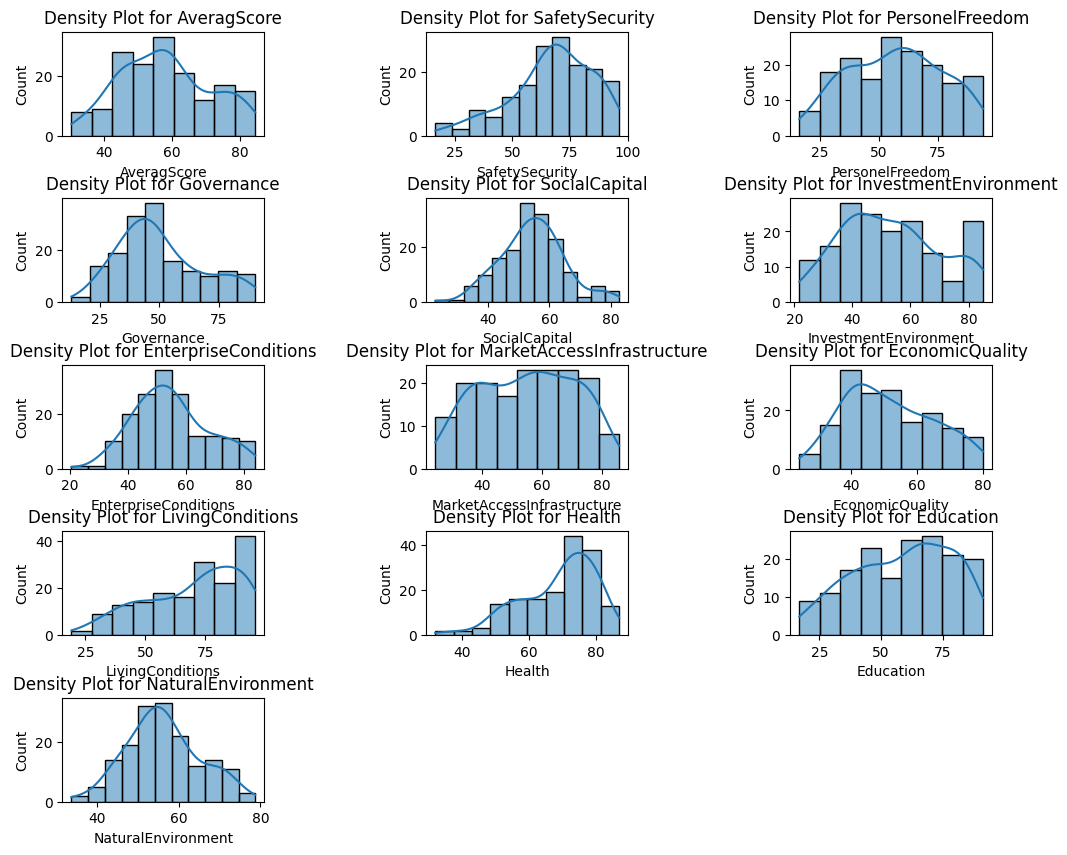

In [11]:
fig, axes = plt.subplots(ncols=3,nrows=5, figsize=(12,10))
axes = axes.flatten()
used_axes = 0

for index,col in enumerate(df.columns):
    if col=='Country':
        continue
    else:
        sns.histplot(data=df,x=col,ax=axes[used_axes],kde=True)
        axes[used_axes].set_title(f'Density Plot for {col}')
        used_axes+=1
    
for ax in axes[used_axes:]:
    fig.delaxes(ax)
    
plt.subplots_adjust(hspace=0.6,wspace=0.8)
plt.show()    

#### A lot of fetures are close to normal distribution and some are a bit skewed

#### We will do Scaling for all the features other than Country, Choosing the Right Scaler:-
***
* StandardScaler: Use when features are normally distributed and the algorithm assumes or benefits from normally distributed data (e.g., K-means, PCA).
* MinMaxScaler: Use when you need features to be within a specific range, especially when using distance-based algorithms (e.g., K-means, DBSCAN).
* RobustScaler: Use when your data contains outliers, and you want to reduce the impact of outliers on the scaling.
* MaxAbsScaler: Use when working with sparse data where preserving zero entries and the sign of values is important.
***
#### Conclusion:-
***
* We do not have outliers and sparse data so Robost and MaxAbs are out of scope
* We can give a try to both Std and MinMax
***

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#### Using Min Max Scaler

In [13]:
scl_min = MinMaxScaler()

In [14]:
# Fit and transform the data, excluding the 'Country' column
scaled_features = scl_min.fit_transform(df.drop(columns=['Country']))

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_features, columns=df.columns.drop('Country'))

# Add the 'Country' column back to the scaled DataFrame
scaled_df['Country'] = df['Country'].values

scaled_df.head()

,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment,Country
0,1.000000,0.953246,0.999872,0.987584,1.000000,0.959400,0.933691,0.886866,0.940870,0.998826,0.894066,0.946960,0.893499,Denmark
1,0.983749,0.932941,0.971773,0.948267,0.928296,0.965561,0.868961,0.901170,0.929547,0.993085,0.916090,0.926065,1.000000,Sweden
2,0.982271,0.962146,1.000000,0.990300,0.940722,0.956556,0.875434,0.839402,0.948778,0.984866,0.928831,0.922850,0.858664,Norway
3,0.980055,0.915267,0.972543,1.000000,0.911167,0.986256,0.895958,0.886541,0.823508,0.981735,0.896250,0.959014,0.983359,Finland
4,0.979132,0.991727,0.915319,0.964563,0.774643,0.933965,1.000000,0.884590,0.992991,0.984344,0.912996,0.950174,0.885955,Switzerland


In [15]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

In [16]:
# Function to calculate the WCSS (within-cluster sum of squares)
def calculate_wcss(data):
    wcss = []
    for n in range(1, 11):
        kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=14)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

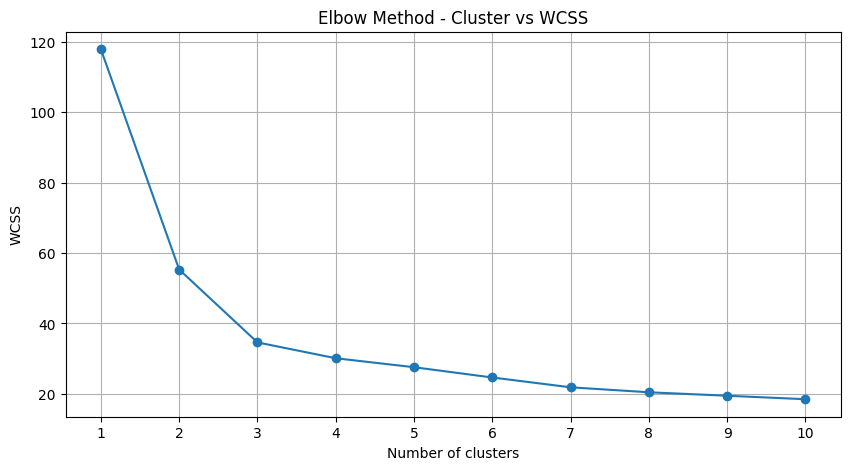

In [17]:
# Calculate WCSS for different number of clusters
wcss = calculate_wcss(scaled_df.drop(columns=['Country'],axis=1))

# Plot the results to visualize the Elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Cluster vs WCSS')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [18]:
type(X)

NameError: name 'X' is not defined

In [ ]:
X = scaled_df.drop(columns=['Country'],axis=1).values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=14)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#### DBSCAN

In [ ]:
# Set parameters for DBSCAN
eps = 0.3
min_samples = 5

# Initialize the DBSCAN clusterer
clusterer = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples
# Note: Silhouette score only makes sense if there are at least 2 clusters
if len(set(cluster_labels)) > 1:
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"The average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(X) + (len(set(cluster_labels)) + 1) * 10])

    y_lower = 10
    for i in range(len(set(cluster_labels))):
        if i == -1:
            continue  # Skip noise points

        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / len(set(cluster_labels)))
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / len(set(cluster_labels)))
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Labeling the clusters
    core_samples_mask = np.zeros_like(cluster_labels, dtype=bool)
    core_samples_mask[clusterer.core_sample_indices_] = True

    # Black removed and is used for noise instead.
    unique_labels = set(cluster_labels)
    for k, col in zip(unique_labels, cm.nipy_spectral(np.linspace(0, 1, len(unique_labels)))):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (cluster_labels == k)

        xy = X[class_member_mask & core_samples_mask]
        ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(f"Silhouette analysis for DBSCAN clustering on sample data with eps = {eps}, min_samples = {min_samples}",
                 fontsize=14, fontweight="bold")

    plt.show()
else:
    print("The silhouette score cannot be calculated for a single cluster.")

#### Note: DBSCAN will not be efficient for this small dataset
***
hence we will go with K-means with K++ initialization for 3 clusters

In [ ]:
# Fit the final KMeans model with the optimal number of clusters
optimal_clusters = 3  # Choose based on silhouette score and elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=14)
df['Cluster'] = kmeans.fit_predict(X)

In [ ]:
df.head()

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)

plt.title('Clusters visualized in the original feature space')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
sns.scatterplot(data=df,x='Cluster',y='AveragScore')
plt.show()

In [ ]:
df.groupby(by='Cluster')['AveragScore'].mean().sort_values(ascending=False)

In [ ]:
df.groupby(by='Cluster')['AveragScore'].max().sort_values(ascending=False)

In [ ]:
df.groupby(by='Cluster')['AveragScore'].min().sort_values(ascending=False)

The countries seem to be clustered in a pretty good shape as we can say that by lookinga at the average score distribution 